<a href="https://colab.research.google.com/github/95-sanya-95/Summer_ML_internship/blob/main/29%20May%20to%2013%20June/Assignment1/new/Assignment1_LR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import jax.numpy as jnp
import jax
import pandas as pd
df = pd.read_csv('../old/USA_cars_datasets.csv');
drop_columns = ['Unnamed: 0', 'vin', 'lot']
df = df.drop(drop_columns, axis=1)
df = df[df['price']!=0]
df = df[df['condition']!='0 hours left']
drop_col = ['color']
df = df.drop(drop_col, axis=1)

drop_col = ['state']
df = df.drop(drop_col, axis=1)

string_columns = ['brand', 'model', 'title_status', 'country','condition']  # Update with your column names

mappings = {}
for col in string_columns:
    unique_entries = sorted(df[col].unique())
    mapping = {entry: idx for idx, entry in enumerate(unique_entries)}
    df[col] = df[col].map(mapping)
    mappings[col] = mapping

for col, mapping in mappings.items():
    print(f"Mapping for column '{col}':")
    for entry, idx in mapping.items():
        print(f"  {entry} -> {idx}")

Mapping for column 'brand':
  acura -> 0
  audi -> 1
  bmw -> 2
  buick -> 3
  cadillac -> 4
  chevrolet -> 5
  chrysler -> 6
  dodge -> 7
  ford -> 8
  gmc -> 9
  harley-davidson -> 10
  heartland -> 11
  honda -> 12
  hyundai -> 13
  infiniti -> 14
  jaguar -> 15
  jeep -> 16
  kia -> 17
  land -> 18
  lexus -> 19
  lincoln -> 20
  maserati -> 21
  mazda -> 22
  mercedes-benz -> 23
  nissan -> 24
  peterbilt -> 25
  ram -> 26
  toyota -> 27
Mapping for column 'model':
  1500 -> 0
  2500 -> 1
  2500hd -> 2
  300 -> 3
  3500 -> 4
  5 -> 5
  acadia -> 6
  altima -> 7
  armada -> 8
  bus -> 9
  cab -> 10
  camaro -> 11
  caravan -> 12
  cargo -> 13
  challenger -> 14
  charger -> 15
  chassis -> 16
  cherokee -> 17
  colorado -> 18
  compass -> 19
  connect -> 20
  convertible -> 21
  corvette -> 22
  country -> 23
  coupe -> 24
  cruiser -> 25
  cruze -> 26
  cutaway -> 27
  cx-3 -> 28
  d -> 29
  dart -> 30
  discovery -> 31
  door -> 32
  doors -> 33
  dr -> 34
  drw -> 35
  durango -

In [2]:
df.head()

,price,brand,model,year,title_status,mileage,country,condition
0,6300,27,25,2008,0,274117.0,1,3
1,2899,8,92,2011,0,190552.0,1,39
2,5350,7,75,2018,0,39590.0,1,16
3,25000,8,32,2014,0,64146.0,1,20
4,27700,5,0,2018,0,6654.0,1,20


In [3]:
jax_array = jnp.array(df.values)
print(jax_array)

[[6.30000e+03 2.70000e+01 2.50000e+01 ... 2.74117e+05 1.00000e+00
  3.00000e+00]
 [2.89900e+03 8.00000e+00 9.20000e+01 ... 1.90552e+05 1.00000e+00
  3.90000e+01]
 [5.35000e+03 7.00000e+00 7.50000e+01 ... 3.95900e+04 1.00000e+00
  1.60000e+01]
 ...
 [9.20000e+03 2.40000e+01 1.19000e+02 ... 3.15940e+04 1.00000e+00
  1.90000e+01]
 [9.20000e+03 2.40000e+01 1.19000e+02 ... 3.25570e+04 1.00000e+00
  1.60000e+01]
 [9.20000e+03 2.40000e+01 1.19000e+02 ... 3.13710e+04 1.00000e+00
  1.90000e+01]]


In [59]:
y = jax_array[:, 0]
X = jax_array[:, 1:]

In [60]:
key = jax.random.PRNGKey(0) # this generates a random number with the seed 0 (helps in duplication) {KIND OF SMART RANDOM NUMBER GENERATION :)}
n_features = 7
X = X[:, :n_features]

In [61]:
beta = jax.random.normal(key, (n_features,))
intercept = 0.0

In [62]:
X.min(1)

Array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

In [63]:
X_mean = jnp.mean(X, 1).reshape(-1, 1)
X_std = jnp.std(X, 1).reshape(-1, 1)
X = (X - X_mean) / X_std

In [64]:
X.shape

(2456, 7)

In [65]:
#defining the model
def model(X, beta, intercept):
    return jnp.dot(X, beta) + intercept

import haiku as hk

def YOLO(config={}):
    def forward(x):
        # actual architecture would go here
        pass
    return forward

def Linear(output_dim, use_bias=True):
    def forward(x):
        # one can also do it manually
        # w = jax.random.normal
        # b = jax.random.normal(0)
        linear_module = hk.Linear(output_dim, with_bias=use_bias)
        return linear_module(x)
    return forward


In [70]:
# Define the loss function (Mean Squared Error)
@jax.jit
def loss(beta, intercept, X, y):
    predictions = model(X, beta, intercept)
    return jnp.mean((y - predictions) ** 2)

@jax.jit # just in time compilation
def new_loss(all_params, input_, y):
    # all_params is always the first argument, None is because we don't need to pasas random key
    pred = model_forward(all_params, None, input_)
    return jnp.power(pred - y, 2).mean()
    
import optax

@jax.jit
def step(all_params, opt_state, input_, y):
    # grads is for all grads
    loss_val, grads = jax.value_and_grad(new_loss)(all_params, input_, y)
    updates, opt_state = opt.update(grads, opt_state, all_params)
    all_params = optax.apply_updates(all_params, updates)
    return all_params, opt_state, loss_val


In [43]:
from jax import grad
loss_grad = grad(loss, argnums=(0, 1)) # HERE IT IS TAKING grad with the first and second argumnet of the loss function
learning_rate = 1e-1
n_iterations = 10000

beta = jax.random.normal(key, (n_features,))
intercept = 0.0

for i in range(n_iterations):
    grads = loss_grad(beta, intercept, X, y)
    beta -= learning_rate * grads[0]
    intercept -= learning_rate * grads[1]
    if i % 1000 == 0:
        print(f"Iteration {i}: Loss = {loss(beta, intercept, X, y)}")


(2456,) (2456,)
Iteration 0: Loss = 231798128.0
Iteration 1000: Loss = 142235536.0
Iteration 2000: Loss = 142235536.0
Iteration 3000: Loss = 142235536.0
Iteration 4000: Loss = 142235536.0


TypeError: Argument '21343.953125' of type <class 'jaxlib.xla_extension.ArrayImpl'> is not a valid JAX type.

In [74]:
# Ram's code

"""
1. First create the architecture in a function of function (where the function you
return is the forward pass of that architecture
2. Initialize your parameters of that architecture
3. Pass the parameters to an optax optimizer's init function
4. Write the loss and step functions
5. Use the step function iteratively in the training loop
"""

init_key = jax.random.PRNGKey(2)
# create the init, apply functions of a haiku model
model_obj = Linear(1) # car price, 1 dimension
init, apply = hk.transform(model_obj)
init = jax.jit(init)
model_forward = jax.jit(apply)
# init function initializes your parameters
all_params = init(init_key, X)

# optimizer
opt = optax.sgd(learning_rate=1e-5)
opt_state = opt.init(all_params)

for i in range(10000):
    # since we call step() repeatedly, it is jitted above
    all_params, opt_state, loss_val = step(all_params, opt_state, X, y)
    if i % 1000 == 0:
        print(f"Iteration {i}: Loss = {loss_val}")

Iteration 0: Loss = 507723552.0
Iteration 1000: Loss = 505508736.0


KeyboardInterrupt: 

In [68]:
all_params

{'linear': {'w': Array([[-0.13594127],
         [-0.05088013],
         [ 0.20370743],
         [-0.17132115],
         [ 0.32017428],
         [ 0.4419095 ],
         [-0.10074732]], dtype=float32),
  'b': Array([0.], dtype=float32)}}

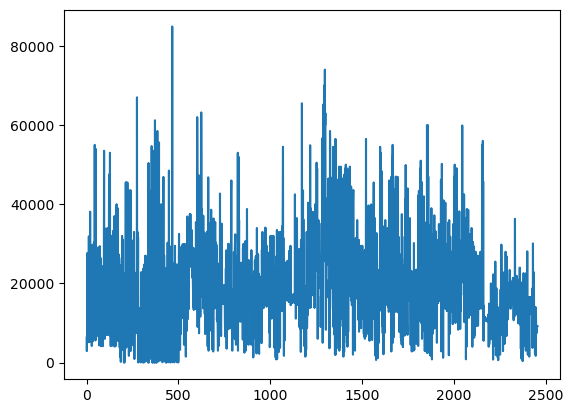

In [40]:
from matplotlib import pyplot as plt

plt.plot(y)

In [10]:
print("Trained parameters (beta):", beta)
print("Intercept: ", intercept)

Trained parameters (beta): [ 0.08086783 -0.38624713 -0.37565565  0.58691907 -1.2758198   2.1192005
 -0.85821223]
Intercept:  1.6764487e-11


In [11]:
# let us check for audi :1, model :5,  year:2005, clean vehicle:0, mileage:60000 , usa :1, 1 day left: 0
new_car_features = [1, 1, 5, 2005, 60000, 1, 0]

# Convert the new car features to a JAX array
new_car_array = jnp.array(new_car_features)

prediction = model(new_car_array, beta, intercept)
print("prediction for audi :1, model :5,  year:2005, clean vehicle:0, mileage:60000 , usa :1, 1 day left: 0", prediction)

prediction for audi :1, model :5,  year:2005, clean vehicle:0, mileage:60000 , usa :1, 1 day left: 0 -75372.48
